# Data preprocessing

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Добавляем корневую директорию проекта в Python path
project_root = os.path.abspath(os.path.join('..'))  # На уровень выше ноутбука
if project_root not in sys.path:
    sys.path.append(project_root)
    
from src.preprocessing import DataPreprocessing
from src.split_raw_data import data_split
from src.save_processed_data import save_proc_data

In [3]:
df = pd.read_csv("../data/raw/diabetes.csv")

### Данные перед препроцессингом

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Описание препроцессинга:

#### Заполнение медианой пропусков следующих полей: 
Glucose - 5 \
BloodPressure - 35 \
SkinThickness - 227 \
Insulin - 374 \
BMI - 11

#### Обработка выбросов(capping) будет проводиться для полей:
Pregnancies \
SkinThickness \
Insulin \
Данные значения обрезаются, а не выкидываются, так как данные медиицинские и это могут быть реальные  экстремальные значения, а не выбросы

#### Feature Engineering, введём вторичные признаки:
Введём показатель HOMA_IR (инсулинорезистентность), который описывает взаимосвязь инсулина и глюкозы и является знаком диабета 2 типа. \
Введём показатель BMI_AGE_BOND, который будет показывать связь возраста и массы тела, при совместном увеличении возраста и массы тела вероятность диабета увеличивается. 

#### Binning и One_Hot_Encoding:
Разделим глюкозу на три показателя: норма, преддиабет, диабет \
Разделим BMI на четыре показателя: недовес, норма, выше_нормы, ожирение 

#### Удаление:
Уберём Glucose, BMI, так как мы введи для них биннинг \
Уберём BloodPressure, так как признак слабо коррелирован с целевой переменной 

#### Standardization:
Для непрерывных признаков проводится стандартизация, так как масштаб у данных разный,
min_max_scaling не проводится, так как есть сильно отличающиеся по значению данные.

### Препроцессинг:

In [5]:
# создание объекта препроцессинга
data_preprocessing = DataPreprocessing()

# разделение на тестовую и обучающуб выборку (с сохранениме)
X_train, X_test, Y_train, Y_test = data_split(df, test_size=0.25, random_state=9)

# преобразование сырых данных
X_train_prep, X_test_prep = data_preprocessing.fit_transform(X_train, X_test)

# сохранение данных после препроцессинга
save_proc_data(X_train_prep, X_test_prep, Y_train, Y_test)

### Анализ данных после препроцессинга

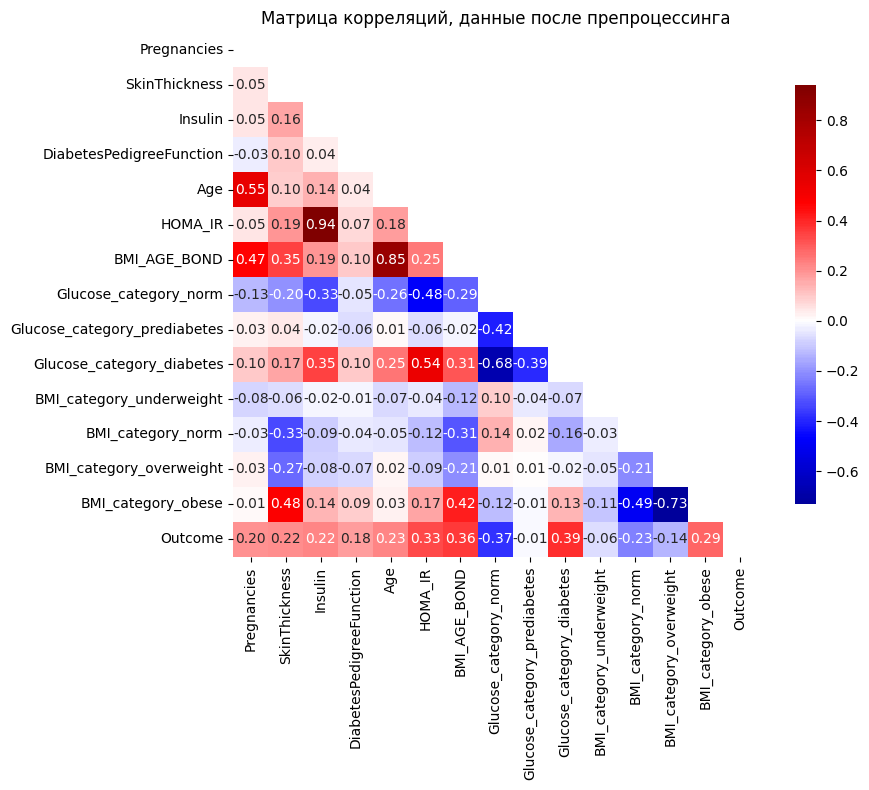

In [6]:
df_temp = X_train_prep.copy()
df_temp['Outcome'] = Y_train

correlation_matrix = df_temp.corr()

plt.figure(figsize=(10, 8))

# Маска для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            cmap='seismic',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляций, данные после препроцессинга')
plt.tight_layout()
plt.show()